In [ ]:
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

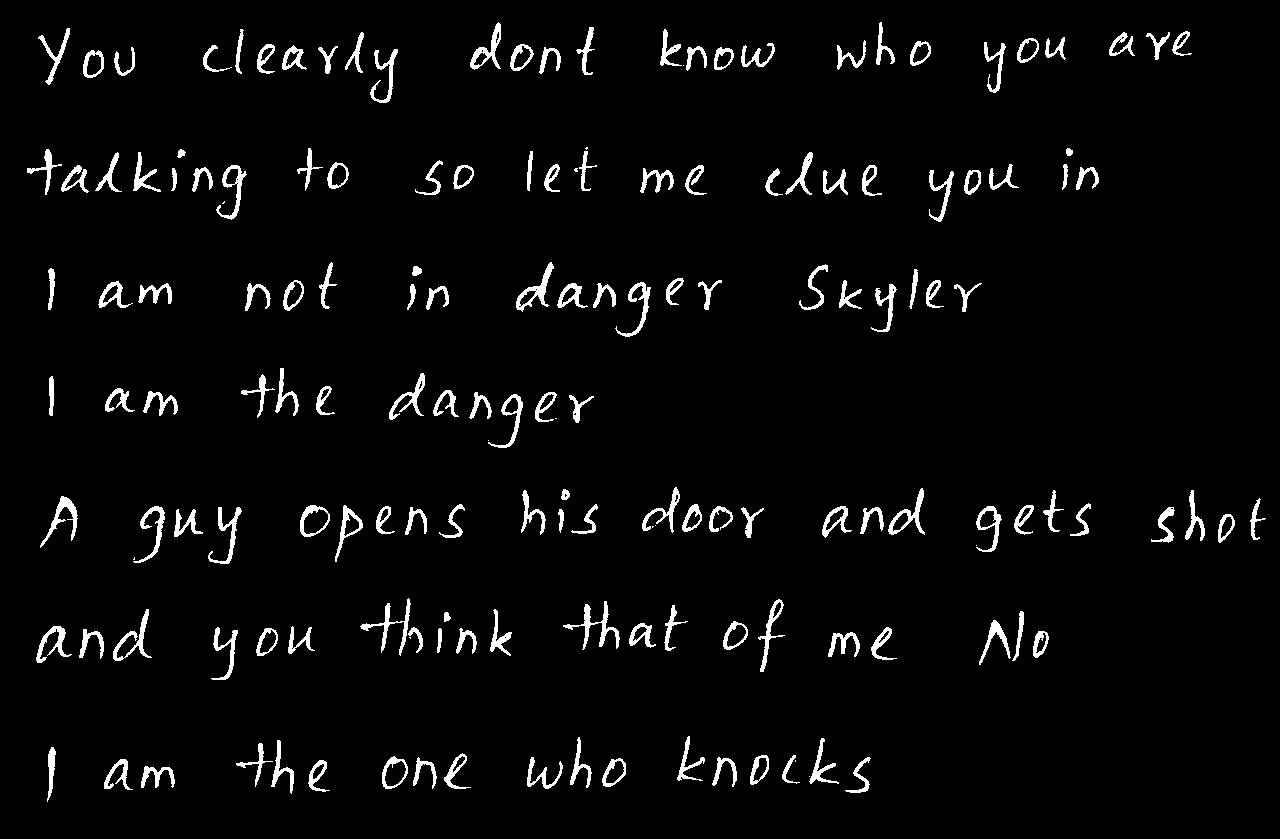

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Final_pic.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))

bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)

out_gray=cv2.divide(image, bg, scale=255)
bw=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY|cv2.THRESH_BINARY_INV )[1]
#rect_kernel = cv.getStructuringElement(cv.MORPH_RECT,(10,10))

#bw = cv2.dilate(bw,se,iterations=1)

cv2_imshow(bw)   


In [ ]:
cv2_imshow(image)

In [ ]:
def left_extreme(img,strt):
  (h,k)=img.shape
  thres = 0
  rev = img.transpose()
  i=strt
  val = rev[i].sum()
  while(val==thres):
    i+=1
    val = rev[i].sum()
  if i>0:
     return i-1
  else:
    return 0

def right_extreme(img):
  (h,k)=img.shape
  thres = 0
  rev = img.transpose()
  i=k-1
  val = rev[i].sum()
  while(val==thres):
    i-=1
    val = rev[i].sum()
  return i+1

In [ ]:
re = right_extreme(bw)
le=left_extreme(bw,0)

In [ ]:
def line_segment(bw):
 re = right_extreme(bw)
 le=left_extreme(bw,0)
 letter =[le]
 thres = 0
 index = le+1
 revim = bw.transpose()

 while(index < re):
    if(revim[index].sum()==thres):
          letter.append(index)
          index = left_extreme(bw,index)
          letter.append(index)
          index+=1
          
    else:
        index+=1

 letter.append(re)
 return letter

In [ ]:
#line_segmenting 
line_seg = line_segment(bw.transpose())
nlines = int(len(line_seg))
print ("The total number of lines available is:",nlines/2)


The total number of lines available is: 4.0


In [ ]:
line_data ={}
for i in range(0,nlines,2):
     line_data.update({int((i/2)+1) : bw[line_seg[i]:line_seg[i+1],:]})


In [ ]:
# to calculate average spacing between words of the writer

char_break = line_segment(line)
char_len = len(char_break)
avg_dist,count ,tot_dis= 0,0,0
for i in range(1,char_len-2):
  if((char_break[i+1]- char_break[i])>((char_break[i]- char_break[i-1])*2)):
    count+=1
    tot_dis += char_break[i+1]- char_break[i]

avg_dist= tot_dis/count
  
    
print(avg_dist)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
alpha = dict()
asc = ord('a')
for i in range(26):
  alpha.update({i+1 : chr(asc+i)})

In [ ]:
def img_input(in_img):
  in_img = cv2.resize(in_img, (28, 28))
  in_img = in_img.reshape(-1,28,28,1)
  return in_img

In [ ]:
def add_padding(img, pad_l, pad_t, pad_r, pad_b):
    
    height, width = img.shape
    
    pad_left = np.zeros((height, pad_l), dtype = np.int)
    img = np.concatenate((pad_left, img), axis = 1)

    pad_up = np.zeros((pad_t, pad_l + width))
    img = np.concatenate((pad_up, img), axis = 0)

    
    pad_right = np.zeros((height + pad_t, pad_r))
    img = np.concatenate((img, pad_right), axis = 1)

 
    pad_bottom = np.zeros((pad_b, pad_l + width + pad_r))
    img = np.concatenate((img, pad_bottom), axis = 0)

    return img

In [ ]:
from tensorflow.keras.models import load_model
ocrmodel = load_model('/content/drive/MyDrive/SIH20epochmodel.h5')

In [ ]:
def top_shrink(img):
  tar = img.transpose()
  le= left_extreme(tar,0)
  re = right_extreme(tar)
  return img[le:re,:]

def whiteper(img):
  h,k = img.shape
  if h*k <= 400:
    return True
  else:
    return False


In [ ]:
def standarize(img):
  h,k = img.shape
  if (h<k):
    res = np.zeros((k,k))
    row = int((k-h)/2)
    res[row:row+h,:]= np.copy(img)
    return res
  elif (h>k):
    res = np.zeros((h,h))
    col = int((h-k)/2)
    res[:,col:col+k]= np.copy(img)
    return res
  elif(h==k):
      return img

In [ ]:
import os.path
with open("Predicted.txt","a") as f:
   file_exists = os.path.exists('Predicted.txt')
   if(file_exists == True):
      f.truncate(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


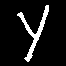

y


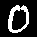

o


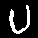

u


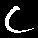

c


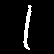

l


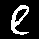

e


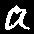

a


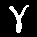

y


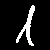

l


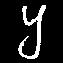

y


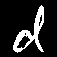

d


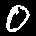

o


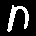

n


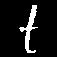

t


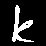

k


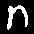

n


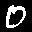

o


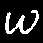

w


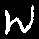

w


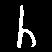

h


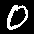

o


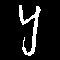

y


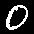

o


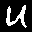

u


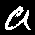

u


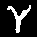

y


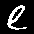

e


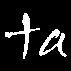

m


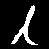

l


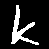

k


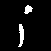

i


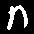

n


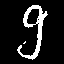

g


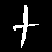

t


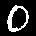

o


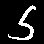

s


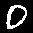

d


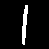

l


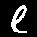

c


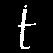

t


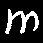

m


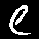

c


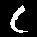

c


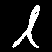

h


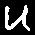

u


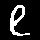

e


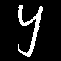

y


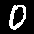

o


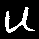

u


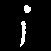

i


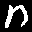

n


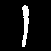

l


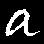

a


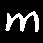

m


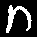

n


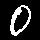

o


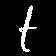

t


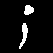

i


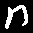

n


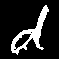

d


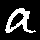

a


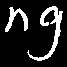

g


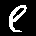

e


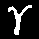

y


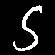

s


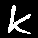

k


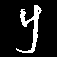

y


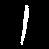

l


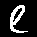

g


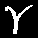

y


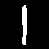

l


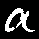

a


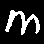

m


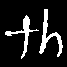

h


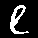

e


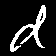

d


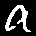

a


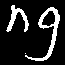

g


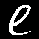

e


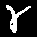

y


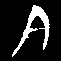

a


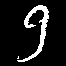

g


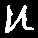

u


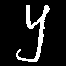

y


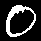

o


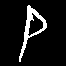

p


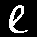

e


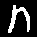

n


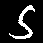

s


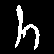

h


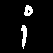

i


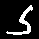

s


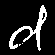

d


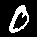

o


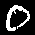

o


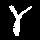

y


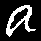

r


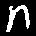

n


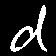

d


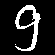

g


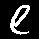

e


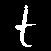

t


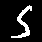

s


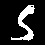

s


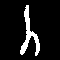

h


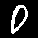

p


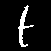

t


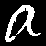

a


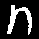

n


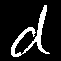

d


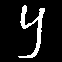

y


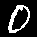

o


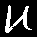

u


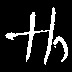

h


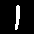

l


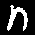

n


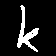

k


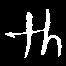

x


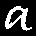

a


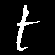

t


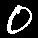

o


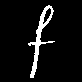

f


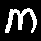

m


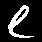

e


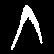

a


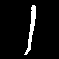

l


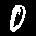

o


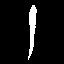

l


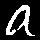

a


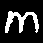

m


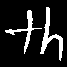

h


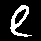

e


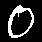

o


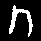

n


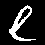

e


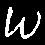

w


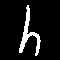

h


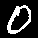

o


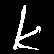

k


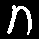

n


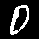

o


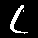

l


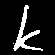

k


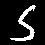

s


In [ ]:
# get the line --> processes the words -->predict -> write it on file

for i in range(len(line_data)):
  line = line_data.get(i+1)
  char_break = line_segment(line)
  char_len = len(char_break)
  avg_space = avgspace(line)
  for i in range(0,char_len,2):
      tempchar= line[:,char_break[i]:char_break[i+1]]
      tempchar = top_shrink(tempchar)
      
      
      tempchar = add_padding(tempchar,4,4,4,4)
      if whiteper(tempchar):
        continue
      tempchar= standarize(tempchar)  
      predict =alpha.get((np.argmax(ocrmodel.predict(img_input(tempchar)))+1))

      with open("Predicted.txt","a") as f:
        f.write(predict) 
  
      cv2_imshow(tempchar)
      print(predict)
      if(i+2 < char_len):
        char_distance = char_break[i+2]-char_break[i]
        if((char_distance>=avg_dist)):
             with open("Predicted.txt","a") as f:
                  f.write(" ")

  with open("Predicted.txt","a") as f:
        f.write("\n") 

